In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#read csv
df_clean_bodieswater = pd.read_csv("data/Percentage Clean Water Bodies (Country).csv")
print(df_clean_bodieswater.head())

print(df_clean_bodieswater.describe())

# check missing values
print("\nMissing values per column:")
print(df_clean_bodieswater.isnull().sum())

          COUNTRY_NAME                                INDICATOR_NAME_unit  \
0              Andorra  Proportion of bodies of water with good ambien...   
1              Andorra  Proportion of bodies of water with good ambien...   
2  Antigua and Barbuda  Proportion of bodies of water with good ambien...   
3            Argentina  Proportion of bodies of water with good ambien...   
4            Australia  Proportion of bodies of water with good ambien...   

   VALUE  YEAR  
0  92.86  2017  
1  86.00  2020  
2   0.00  2020  
3  17.95  2020  
4  87.65  2020  
            VALUE         YEAR
count  147.000000   147.000000
mean    70.965646  2018.775510
std     25.256981     1.479522
min      0.000000  2017.000000
25%     56.500000  2017.000000
50%     78.570000  2020.000000
75%     91.455000  2020.000000
max    100.000000  2020.000000

Missing values per column:
COUNTRY_NAME           0
INDICATOR_NAME_unit    0
VALUE                  0
YEAR                   0
dtype: int64


In [7]:
# clean data
del df_clean_bodieswater['INDICATOR_NAME_unit']
df_clean_bodieswater = df_clean_bodieswater.rename(columns={'COUNTRY_NAME': 'Country', 'VALUE': 'Value', 'YEAR': 'Year'})
display(df_clean_bodieswater)


,Country,Value,Year
0,Andorra,92.86,2017
1,Andorra,86.00,2020
2,Antigua and Barbuda,0.00,2020
3,Argentina,17.95,2020
4,Australia,87.65,2020
...,...,...,...
142,United States of America,33.67,2020
143,Uruguay,75.85,2020
144,Zambia,75.00,2017
145,Zimbabwe,76.47,2017


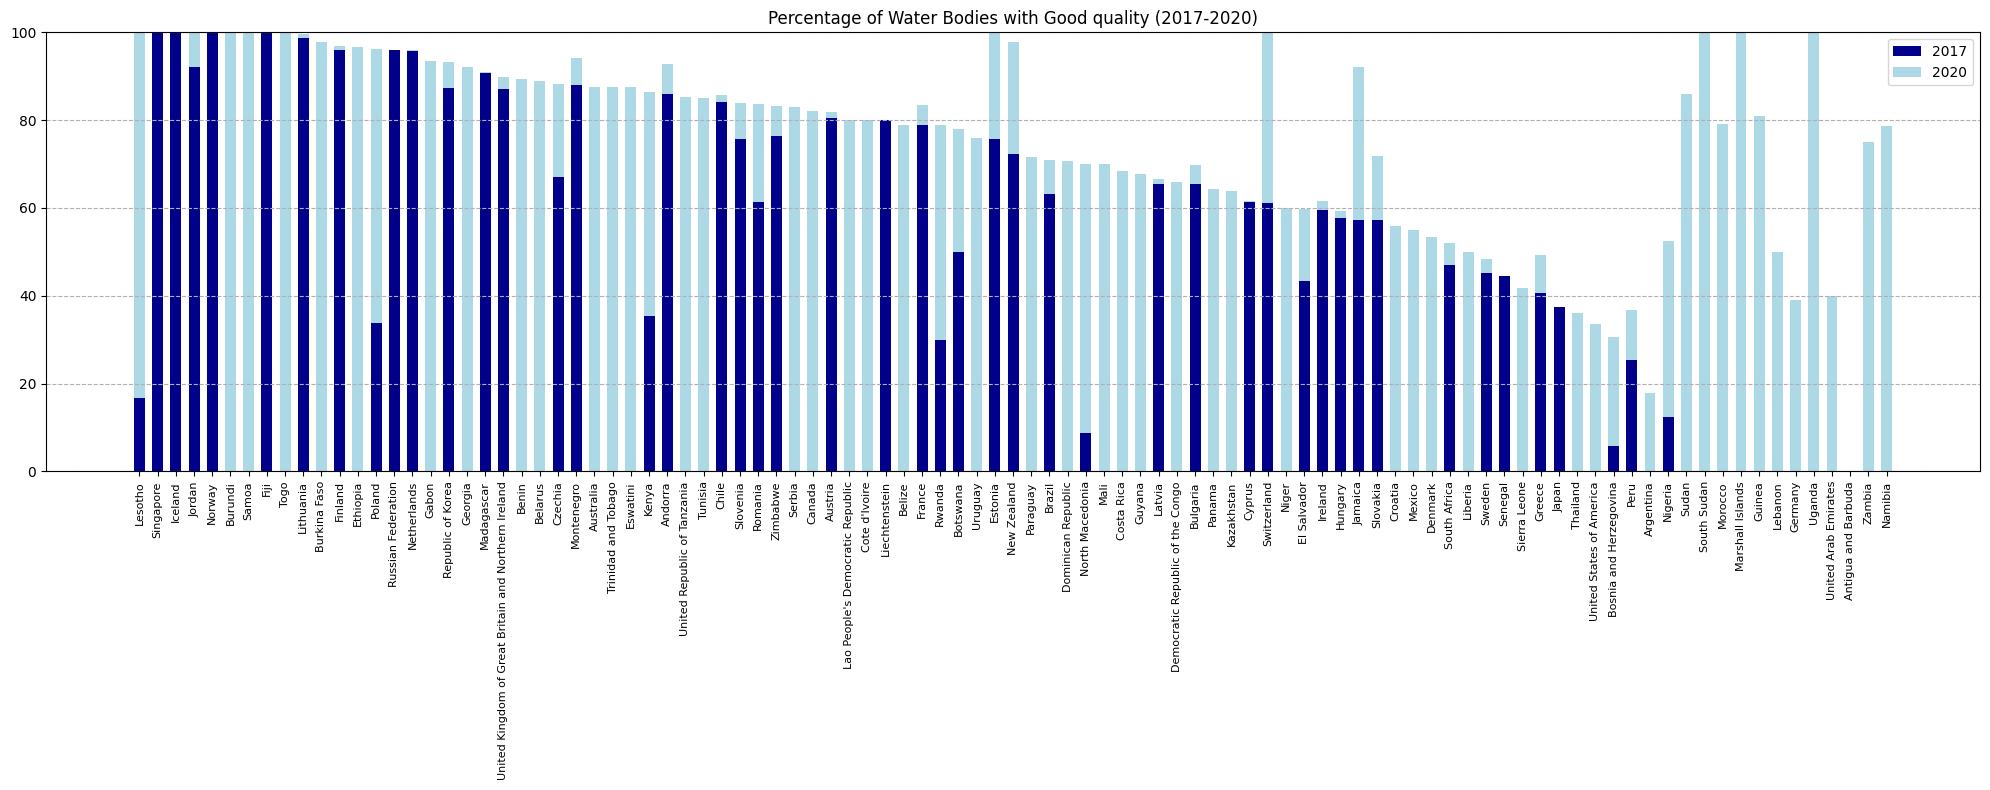

In [9]:
# create plot 

df_pivot = df_clean_bodieswater.pivot(index='Country', columns='Year', values='Value')
df_pivot = df_pivot.fillna(0)
df_pivot = df_pivot.sort_values(by=2020, ascending=False)

# create stacked barchart
plt.figure(figsize=(20, 8))
plt.bar(df_pivot.index, df_pivot[2017], width=0.6, label='2017', color='darkblue')
plt.bar(df_pivot.index, df_pivot[2020] - df_pivot[2017], bottom=df_pivot[2017], width=0.6, label='2020', color='lightblue')

plt.title('Percentage of Water Bodies with Good quality (2017-2020)')
plt.margins(y=0.1)
plt.xticks(rotation=90, fontsize=8)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# save graph to folder as an img 

output_folder = "visualizations"  # Folder name
output_path = os.path.join(output_folder, "percentage_good_water_bodies_countries.png")  # Full path
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save as high-res PNG

plt.show()

